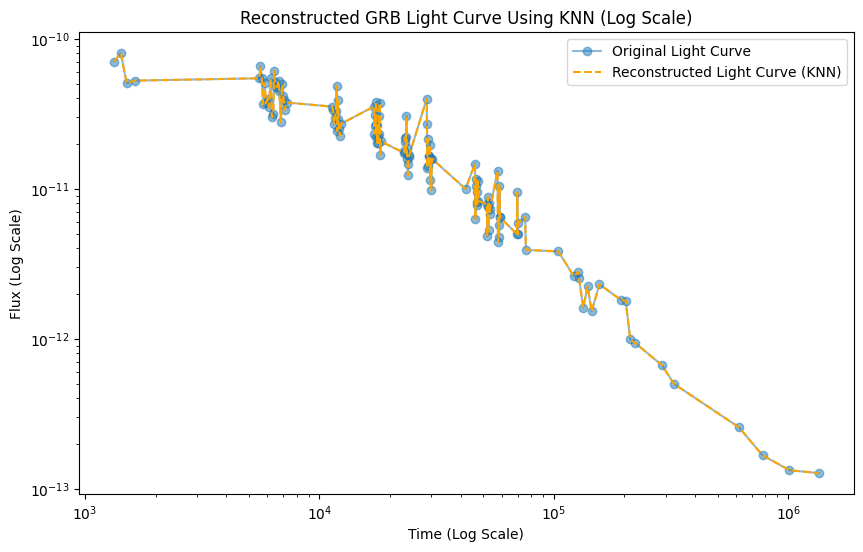

Reconstructed light curve saved to 'reconstructed_grb_lightcurve.csv'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer


file_path = "GRB121217A_trimmed.csv"
data = pd.read_csv(file_path)

time = data['t'].values.reshape(-1, 1)
flux = data['flux'].values

# Combine time and flux into a 2D array for KNNImputer
combined_data = np.column_stack((time, flux))

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights="distance")
reconstructed_data = imputer.fit_transform(combined_data)

# Extract reconstructed flux values
reconstructed_flux = reconstructed_data[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(time, flux, label="Original Light Curve", alpha=0.5, marker='o')
plt.plot(time, reconstructed_flux, label="Reconstructed Light Curve (KNN)", linestyle="--", color='orange')

plt.xscale('log')
plt.yscale('log')

plt.title("Reconstructed GRB Light Curve Using KNN (Log Scale)")
plt.xlabel("Time (Log Scale)")
plt.ylabel("Flux (Log Scale)")
plt.legend()
plt.show()

reconstructed_df = pd.DataFrame({'Time': time.flatten(), 'Reconstructed_Flux': reconstructed_flux})
reconstructed_df.to_csv("reconstructed_grb_lightcurve.csv", index=False)
print("Reconstructed light curve saved to 'reconstructed_grb_lightcurve.csv'")
